## Machine Learning on Datasets

In [147]:
#Importing libraries

#there are a bunch of sun-libraries that will also be imported over here instead
#of being imported randomly throughout the cooding experience
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
from matplotlib import pyplot as plt # type: ignore 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

## Reading the data

In [148]:
data=pd.read_csv('IRIS.csv')

Doing basic functions on the data

In [149]:
data.describe()
#gives basic understanding of the dataset

data.info()
#NOTE: there exists 2 columns
#1) ID column that needs to be dropped because of its increasing numeric value
#2) Species column that contains object which should be label encoded

data.size
#displays the total amount entries in every column included.

data.shape
#tells us the division of rows and columns of the table
#i.e. 6 features with 150 rows of entries

data["Species"].value_counts()
#displays all the values on different species

data.isna().sum()
#checks the total number of NaN values
#consists 0 therefore no cleaning required

data.isnull().sum()
#checks the total number of NULL values
#consists 0 therefore no cleaning required

data.duplicated().sum()
#checks for number of duplicates in the dataset

data.drop_duplicates(inplace=True)
#removes that duplicate from the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Encoding Data

<Axes: >

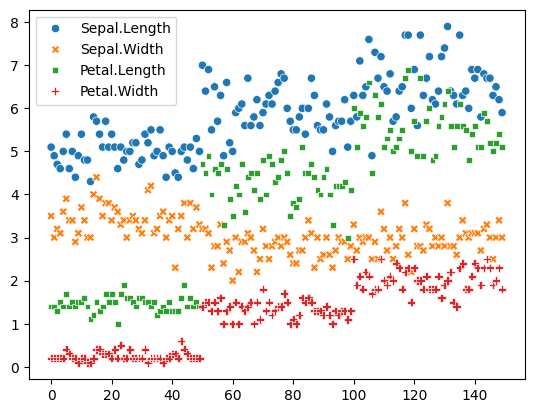

In [150]:
label_encoder=LabelEncoder()
#defining function

data['Species'] = label_encoder.fit_transform(data['Species'])
#encoding the label column for model training and fitting

data=data.drop(columns=['ID'])
#droping the ID column as it is not usefull

data_plotting=data.drop(columns=['Species'])
#making a variable just to see the scatter plot without the species

sns.scatterplot(data=data_plotting)
#plotting the data once for better visualisation of our work

Outlier checking and removal

NOTE: there will be some outliars still and we need to accept them because they cannot be filtered no matter what...

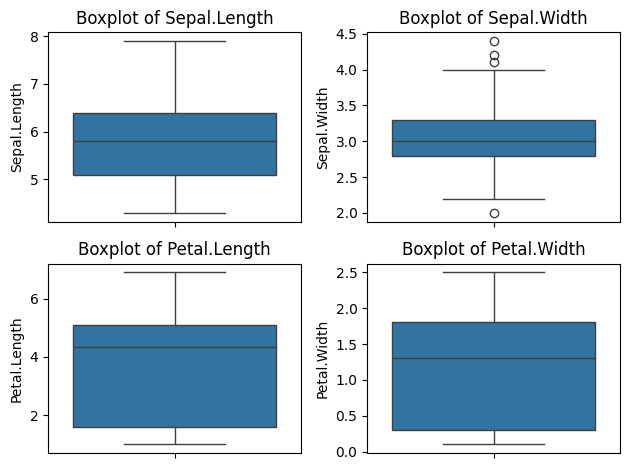

In [151]:
for i,col in enumerate(['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()
#here we see only Sepal.width have some outliers, but the count is very small
#so we will ignore the outliars.

## Applying Regression

<img src="Diagrams/Logistic Regression.png" width="50%">

Linear Regression

In [155]:
X=data[['Sepal.Length','Sepal.Width','Petal.Length']].values
Y=data[['Petal.Width']]


model=LinearRegression()

model.fit(X,Y)


def Petal_Width(Sl, Sw, Pl):
    prediction = model.predict([[Sl, Sw, Pl]])
    print(f'A flower with {Sl} Sepal Length, {Sw} Sepal Width, {Pl} Petal Length will have Petal Length: {float(prediction[0]):.2f}')

i = interact(Petal_Width, Sl=(4.3,5.1,0.1),Sw=(2,2.8,0.1),Pl=(1,1.6,0.1))
display(i)

print ('Residual sum of squares: %.2f' % np.mean((model.predict(X)- Y) ** 2))

interactive(children=(FloatSlider(value=4.6, description='Sl', max=5.1, min=4.3), FloatSlider(value=2.3, descr…

<function __main__.Petal_Width(Sl, Sw, Pl)>

Residual sum of squares: 0.04


Logistic Regression

## Naive bayes

<img src="Diagrams/Naive Bayes.png" width="50%">

## Decision Tree

<img src="Diagrams/Decision Tree.png" width="50%" style="background-color: white;">